In [1]:
import os
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

# from sklearn.cluster import KMeans, spectral_clustering
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import silhouette_score, silhouette_samples
from copy import deepcopy

In [2]:
os.chdir("/home/g.esposito/sc2-benchmark")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/sc2-benchmark") if "L" in file_path and file_path != "LICENSE"]
# print(log_folders)

general_report = pd.DataFrame([])
for layer_conf in log_folders:
    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store"]:
            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "Faulty_boxes_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"
            # print(report.columns)
            report['bit_faulty_position'] = np.log2(report['bitmask'])
            report.drop(columns=['Unnamed: 0'], inplace=True)
            general_report = pd.concat([general_report, report], axis=0, ignore_index=True)

general_report['iou_score'] = general_report['iou score']
general_report.drop(columns="iou score", inplace=True)
general_report.describe()

,imID,layer,kernel,channel,row,col,bitmask,G_lab,F_count,F_lab,G_count,G_score,T_count,area_ratio,confidence_covered,f_candidate_conf,bit_faulty_position,iou_score
count,165310.000000,165310.000000,165310.000000,165310.000000,165310.000000,165310.000000,1.653100e+05,165310.00000,165310.000000,165310.000000,165310.000000,165310.000000,165310.000000,165310.000000,165310.000000,165310.000000,165310.000000,165310.000000
mean,54.049525,2.151533,33.492844,32.046083,1.095790,1.091150,3.513173e+08,26.99556,11.937862,27.440282,10.572579,86.279749,12.684417,117.864512,0.956276,82.394769,25.750287,75.105121
std,29.922442,1.621976,50.312706,39.200973,1.490775,1.489691,6.646666e+08,28.09992,7.490254,28.250349,6.343142,9.290766,8.092998,403.315702,0.204481,17.006570,3.065105,23.573167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048576e+06,1.00000,0.000000,1.000000,1.000000,70.001930,1.000000,0.010216,0.000000,5.001247,20.000000,0.000000
25%,26.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.677722e+07,1.00000,7.000000,1.000000,6.000000,77.593559,7.000000,87.837838,1.000000,74.438496,24.000000,75.029126
50%,54.000000,2.000000,15.000000,25.000000,1.000000,1.000000,6.710886e+07,10.00000,11.000000,10.000000,10.000000,86.911404,11.000000,100.000000,1.000000,86.264929,26.000000,84.192440
75%,79.000000,4.000000,45.000000,47.000000,1.000000,1.000000,2.684355e+08,56.00000,15.000000,57.000000,13.000000,94.961971,17.000000,113.302141,1.000000,94.792517,28.000000,87.920168
max,99.000000,4.000000,255.000000,255.000000,6.000000,6.000000,2.147484e+09,86.00000,42.000000,88.000000,29.000000,99.986994,34.000000,47232.000000,1.000000,99.977285,31.000000,100.000000


In [3]:
counter = 0
print(len(general_report.query("F_lab!=G_lab")))
print(len(general_report))

10959
165310


In [4]:
# general_report.query("F_lab!=G_lab").describe()
general_report.query("iou_score < 90 and F_lab==G_lab and confidence_covered==1.0").describe()

,imID,layer,kernel,channel,row,col,bitmask,G_lab,F_count,F_lab,G_count,G_score,T_count,area_ratio,confidence_covered,f_candidate_conf,bit_faulty_position,iou_score
count,149779.000000,149779.000000,149779.000000,149779.000000,149779.000000,149779.000000,1.497790e+05,149779.000000,149779.000000,149779.000000,149779.000000,149779.000000,149779.000000,149779.000000,149779.0,149779.000000,149779.000000,149779.000000
mean,54.534427,2.135513,33.728413,32.080365,1.098285,1.092610,3.489607e+08,26.691719,12.206417,26.691719,10.654004,87.220137,12.971451,103.087944,1.0,85.929447,25.738895,79.572169
std,30.263679,1.619644,50.329173,39.335396,1.493732,1.490995,6.619909e+08,27.985984,7.566747,27.985984,6.427448,9.057881,8.154959,77.104158,0.0,10.686012,3.067692,16.519499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.048576e+06,1.000000,1.000000,1.000000,1.000000,70.001930,1.000000,1.049869,1.0,60.001081,20.000000,0.000000
25%,26.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.677722e+07,1.000000,7.000000,1.000000,6.000000,79.080111,7.000000,88.756614,1.0,77.419084,24.000000,77.945493
50%,59.000000,2.000000,16.000000,25.000000,1.000000,1.000000,6.710886e+07,9.000000,11.000000,9.000000,10.000000,89.015961,12.000000,100.184672,1.0,88.323587,26.000000,84.893883
75%,79.000000,4.000000,46.000000,47.000000,1.000000,1.000000,2.684355e+08,56.000000,15.000000,56.000000,13.000000,95.475054,17.000000,113.043478,1.0,95.374730,28.000000,88.123515
max,99.000000,4.000000,255.000000,255.000000,6.000000,6.000000,2.147484e+09,86.000000,42.000000,86.000000,29.000000,99.980754,34.000000,14594.920635,1.0,99.977285,31.000000,89.999377


In [5]:
general_report.query("iou_score < 90 and F_lab==G_lab").groupby(by="layer").count()

,FaultID,imID,kernel,channel,row,col,bitmask,G_lab,f_bb,g_bb,...,F_lab,G_count,G_score,T_count,area_ratio,confidence_covered,f_candidate_conf,conf_detail,bit_faulty_position,iou_score
layer,,,,,,,,,,,,,,,,,,,,,
0,35670,35670,35670,35670,35670,35670,35670,35670,35670,35670,...,35670,35670,35670,35670,35670,35670,35670,35670,35670,35670
1,30166,30166,30166,30166,30166,30166,30166,30166,30166,30166,...,30166,30166,30166,30166,30166,30166,30166,30166,30166,30166
2,20735,20735,20735,20735,20735,20735,20735,20735,20735,20735,...,20735,20735,20735,20735,20735,20735,20735,20735,20735,20735
3,11682,11682,11682,11682,11682,11682,11682,11682,11682,11682,...,11682,11682,11682,11682,11682,11682,11682,11682,11682,11682
4,55441,55441,55441,55441,55441,55441,55441,55441,55441,55441,...,55441,55441,55441,55441,55441,55441,55441,55441,55441,55441


## Regression Task Criticality

In [6]:
print(f'Percentage of critical boxes because of the low iou score: {len(general_report.query("iou_score < 90 and F_lab==G_lab and confidence_covered==1.0"))/len(general_report)}')

Percentage of critical boxes because of the low iou score: 0.906049240820277


Most of the boxes are here reported because of the iou_score which is critical and not for the different label

In [7]:
general_report['confidence_ratio'] = general_report['f_candidate_conf'] / general_report['G_score']
score_report = general_report.query("iou_score < 90 and F_lab==G_lab and confidence_covered==1.0")
# general_report['confidence_ratio'].describe()

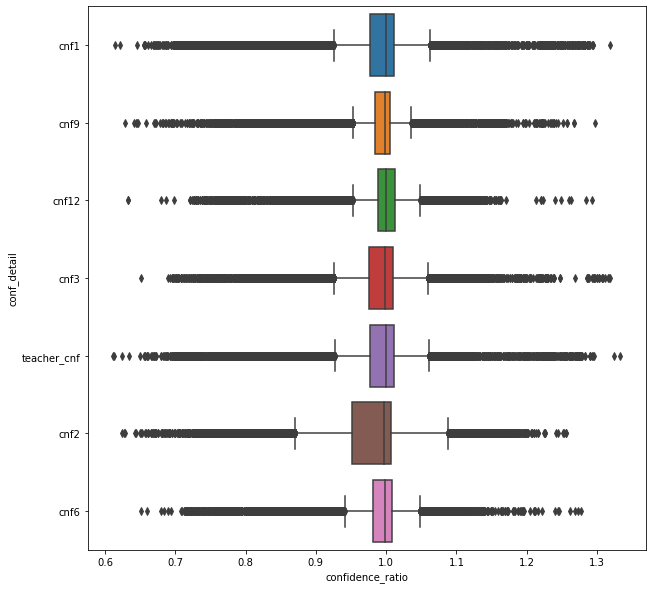

In [8]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='confidence_ratio', y = 'conf_detail', data = score_report)

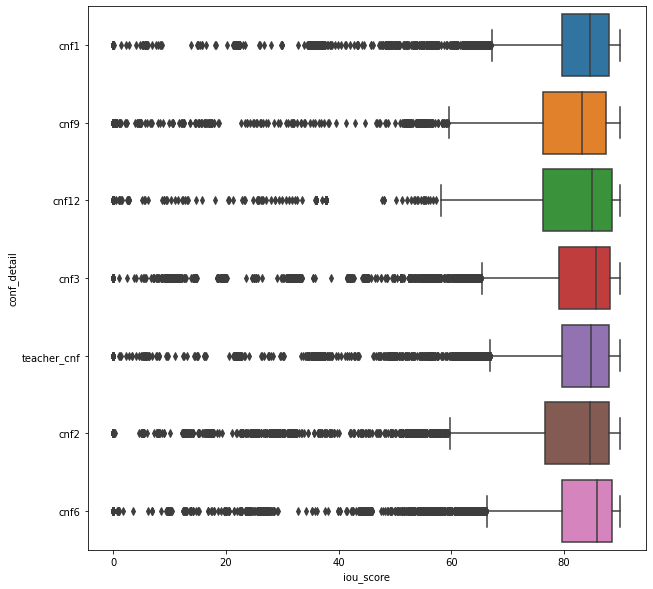

In [9]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='iou_score', y = 'conf_detail', data = score_report)

In [20]:
q1 = score_report.groupby("conf_detail").describe()['iou_score']['25%']
q3 = score_report.groupby("conf_detail").describe()['iou_score']['75%']
iqr = q3 - q1

iqr


conf_detail
cnf1            8.371892
cnf12          12.308249
cnf2           11.393435
cnf3            9.131434
cnf6            8.907665
cnf9           11.228814
teacher_cnf     8.484391
dtype: float64

While the confidence ratio has a variability around 1 that is low (that means that the confidence of the model in predicting something does not change too much), the iou_score is more sensible.

On the basis of the resilience (iou_score), models  can be ranked with respect to the interquantile distance:
- teacher_cnf
- cnf1
- cnf6
- cnf3
- cnf9
- cnf2
- cnf12

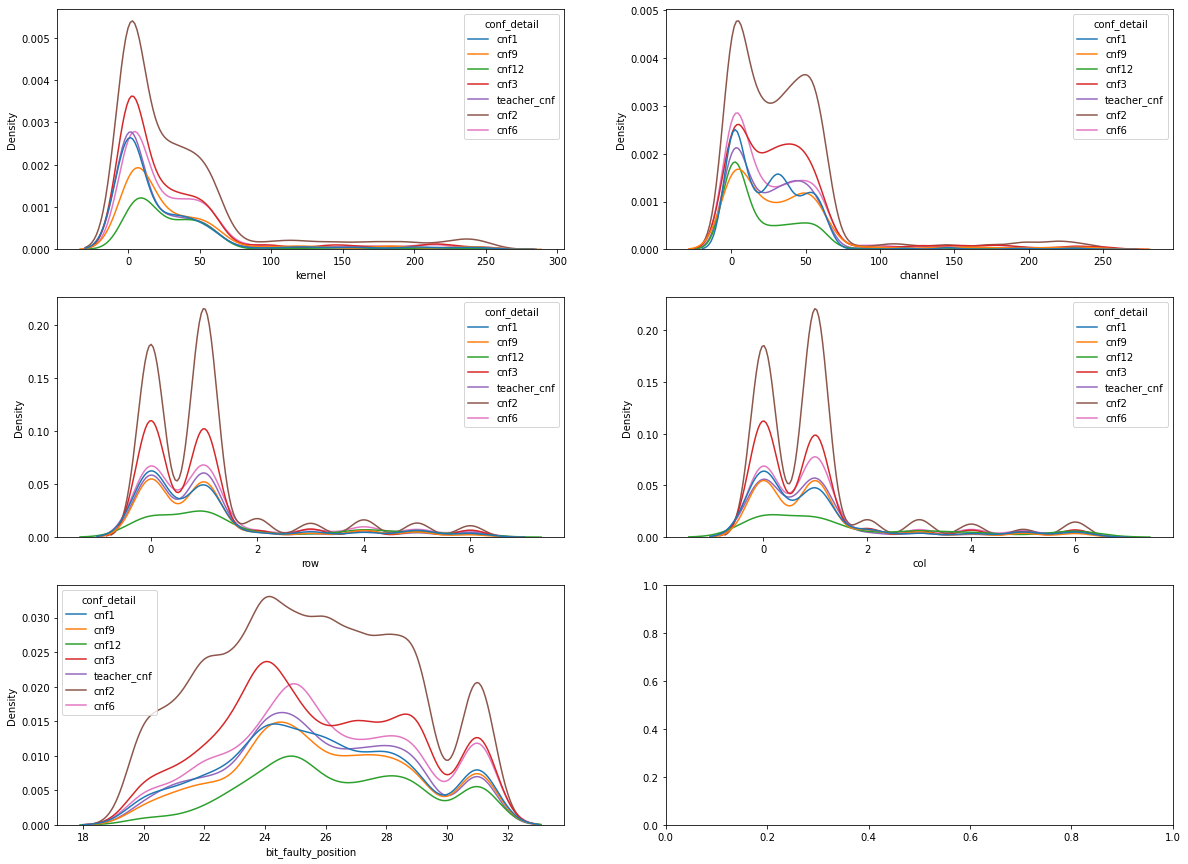

In [16]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='kernel', hue = 'conf_detail', ax=ax[0][0], palette="tab10")
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='channel', hue = 'conf_detail', ax=ax[0][1], palette="tab10")
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='row', hue = 'conf_detail', ax=ax[1][0], palette="tab10")
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='col', hue = 'conf_detail', ax=ax[1][1], palette="tab10")
sns.kdeplot(data = score_report[score_report['iou_score']<70], x ='bit_faulty_position', hue = 'conf_detail', ax=ax[2][0], palette="tab10")

### Is there any behaviour with respect to a specific fault as combination of: kernel, channel, row, col, bit_faulty_position

In [17]:
score_report.columns

Index(['FaultID', 'imID', 'layer', 'kernel', 'channel', 'row', 'col',
       'bitmask', 'G_lab', 'f_bb', 'g_bb', 'F_count', 'F_lab', 'G_count',
       'G_score', 'T_count', 'area_ratio', 'confidence_covered',
       'f_candidate_conf', 'conf_detail', 'bit_faulty_position', 'iou_score',
       'confidence_ratio'],
      dtype='object')

## Area ratio

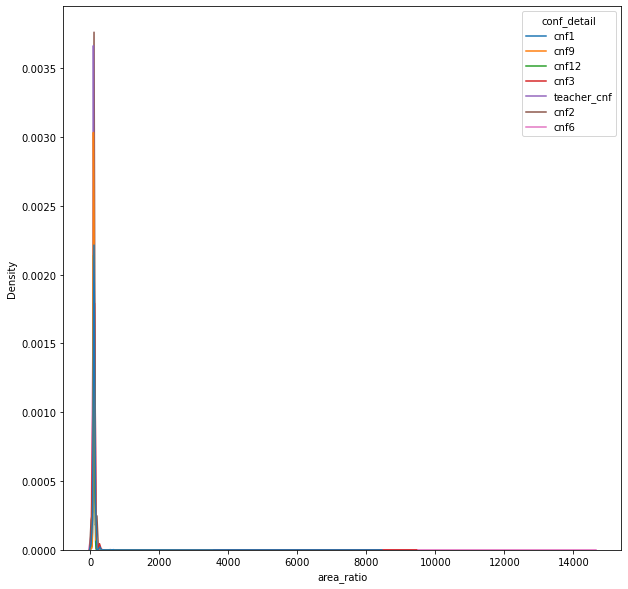

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.kdeplot(ax=ax, data=score_report, x= 'area_ratio', hue='conf_detail')

In [20]:
score_report[score_report['area_ratio']>200].groupby(by='conf_detail').groups
for key, indices in score_report[score_report['area_ratio']>200].groupby(by='conf_detail').groups.items():
    print(f'{key}: {len(indices)}')

cnf1: 141
cnf12: 18
cnf2: 249
cnf3: 360
cnf6: 33
cnf9: 44
teacher_cnf: 132


In [21]:
print(f"number of boxes whose area is the double of the fault free model: {len(score_report[score_report['area_ratio']>200])}")
print(f"which represents the {(len(score_report[score_report['area_ratio']>200]) / len(score_report))*100}% of the total critical boxes")

number of boxes whose area is the double of the fault free model: 977
which represents the 0.6522943803871036% of the total critical boxes


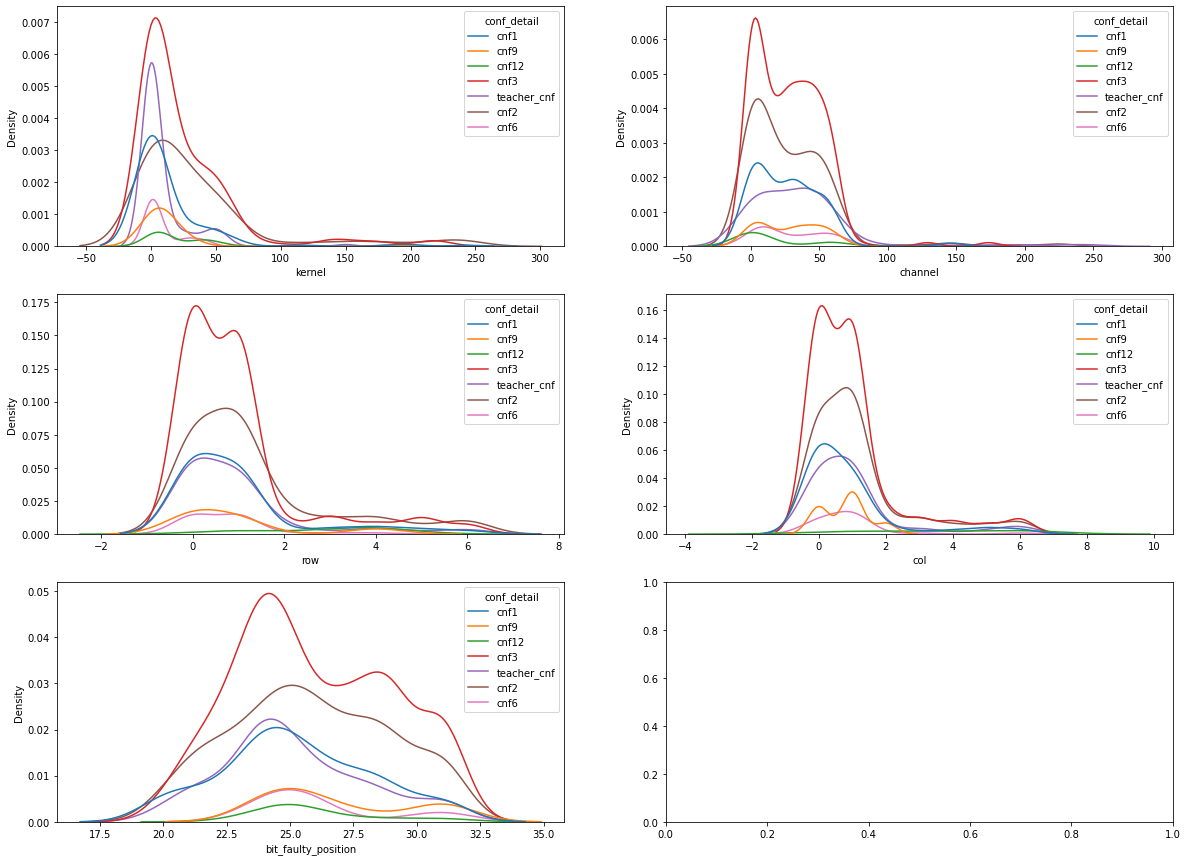

In [22]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='kernel', hue = 'conf_detail', ax=ax[0][0])
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='channel', hue = 'conf_detail', ax=ax[0][1])
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='row', hue = 'conf_detail', ax=ax[1][0])
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='col', hue = 'conf_detail', ax=ax[1][1])
sns.kdeplot(data = score_report[score_report['area_ratio']>200], x ='bit_faulty_position', hue = 'conf_detail', ax=ax[2][0])

In these plots we can see where are the most critical points in terms of area ratio

### Cutting off these outliers let us see the distribution

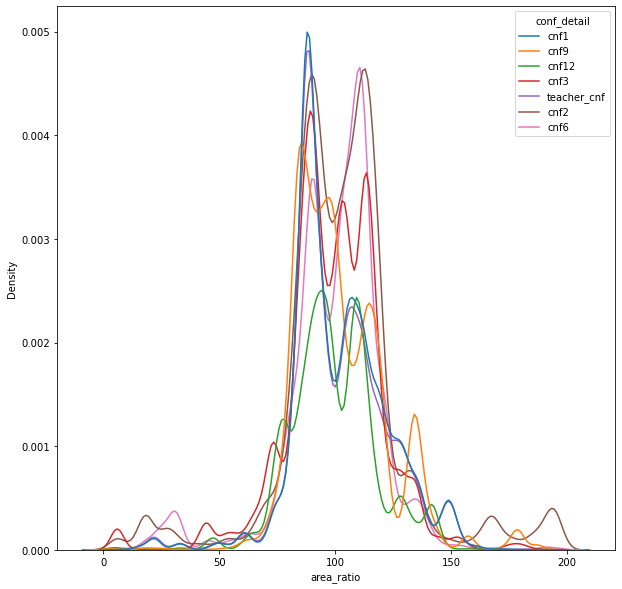

In [23]:
normal_area = score_report[score_report['area_ratio']<200]
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.kdeplot(ax=ax, data=normal_area, x= 'area_ratio', hue='conf_detail')

## Classification task evaluation

In [24]:
general_report['confidence_ratio'] = general_report['f_candidate_conf'] / general_report['G_score']
score_report = general_report.query("F_lab!=G_lab and confidence_covered==1.0")

Text(0.5, 1.0, 'confidence ratio')

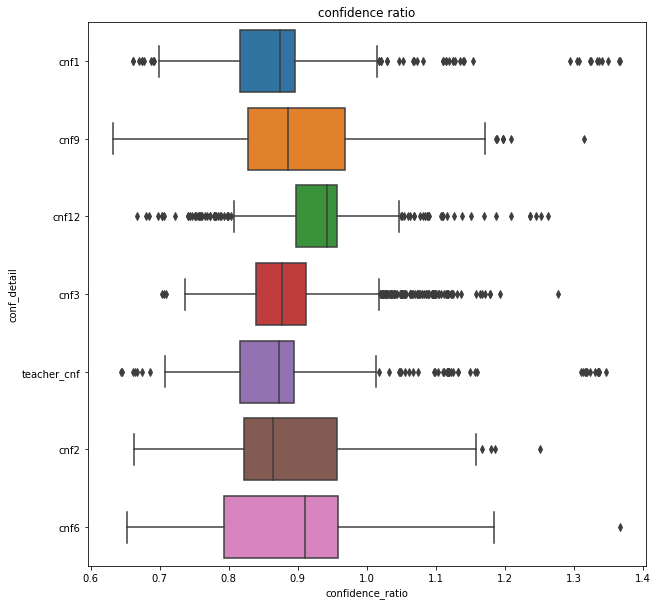

In [27]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='confidence_ratio', y = 'conf_detail', data = score_report)
ax.set_title('confidence ratio')

It means that if it wrongly predicts the bounding box, then also the label classification is hardly affected. (This implication comes from the fact that the regression is first performed and then the classification)

Text(0.5, 1.0, 'iou score')

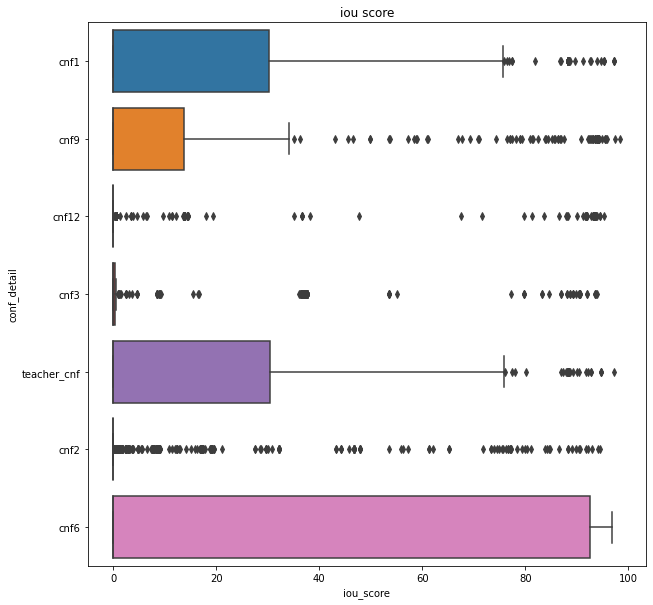

In [28]:
# score_report['confidence_ratio'] = np.log(score_report['confidence_ratio'])
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(x='iou_score', y = 'conf_detail', data = score_report)
ax.set_title('iou score')

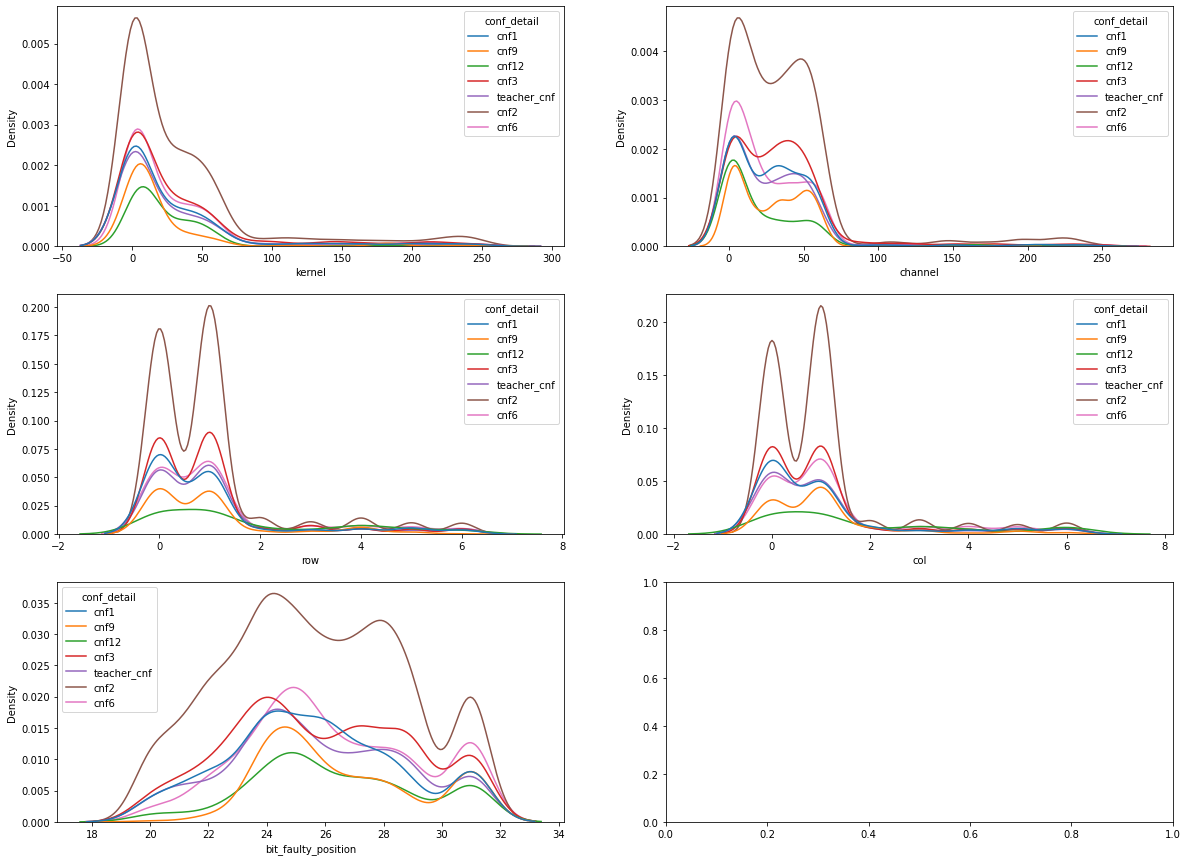

In [29]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
sns.kdeplot(data = score_report, x ='kernel', hue = 'conf_detail', ax=ax[0][0], palette="tab10")
sns.kdeplot(data = score_report, x ='channel', hue = 'conf_detail', ax=ax[0][1], palette="tab10")
sns.kdeplot(data = score_report, x ='row', hue = 'conf_detail', ax=ax[1][0], palette="tab10")
sns.kdeplot(data = score_report, x ='col', hue = 'conf_detail', ax=ax[1][1], palette="tab10")
sns.kdeplot(data = score_report, x ='bit_faulty_position', hue = 'conf_detail', ax=ax[2][0], palette="tab10")

Actually the very impacting fault features are row and column which have some picks both in 0 and 1 with 20% of prevalence. 

## Confidence analysis

In [65]:
general_report['confidence_ratio'] = general_report['f_candidate_conf'] / general_report['G_score']
# score_report = general_report.query("confidence_covered==0.0")
general_report['confidence_coverage'] = general_report.groupby(by=['conf_detail', 'bit_faulty_position'])['confidence_covered'].transform(lambda x: x.sum())
general_report['confidence_coverage']

0         1650.0
1         1650.0
2         1650.0
3         1650.0
4         1650.0
           ...  
165305    3730.0
165306    3730.0
165307    3730.0
165308    3730.0
165309    3730.0
Name: confidence_coverage, Length: 165310, dtype: float64

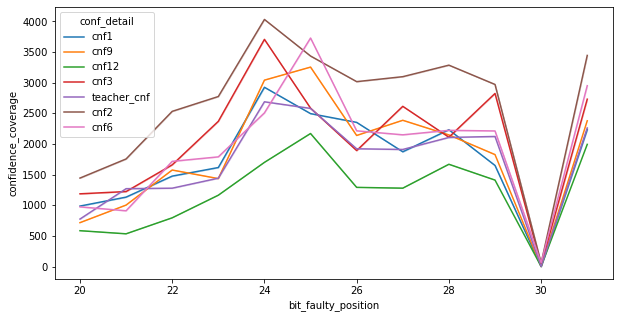

In [66]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(ax=ax, data = general_report, x = 'bit_faulty_position', y = 'confidence_coverage', hue='conf_detail')
ax.grid()
ax.set_title("Confidence coverage VS bit position BY configuration")
ax.grid()